In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [3]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

data.groupby(['MaritalDesc', 'Sex'])\
     .agg(min_salary=('Salary','min'), median_salary=('Salary','median'),
          max_salary=('Salary','max'), average_salary=('Salary','mean'))

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [4]:
#code here
data.groupby(['TermReason'])\
    .agg(total_termination = ('TermReason','count'))\
    .sort_values(by='total_termination', ascending = False).head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [5]:
#code here
data[['RecruitmentSource', 'PerformanceScore']].\
     loc[data['PerformanceScore']=='Exceeds'].\
     groupby(['RecruitmentSource']).\
     agg(total_recruit = ('PerformanceScore','count')).\
     sort_values(by='total_recruit', ascending = False).head(7)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [6]:
#code here
data.groupby(['Department']).\
     agg({'ManagerName': 'nunique'})


,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [7]:
#code here
data.groupby(['Sex']).\
     agg('Termd').value_counts(normalize = True)


Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

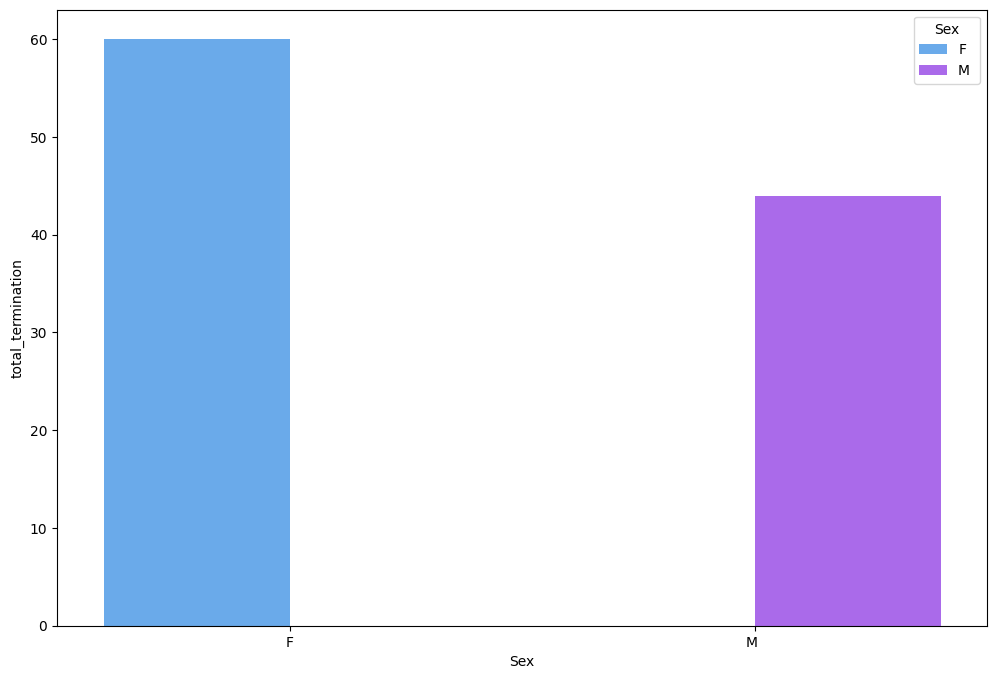

In [8]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

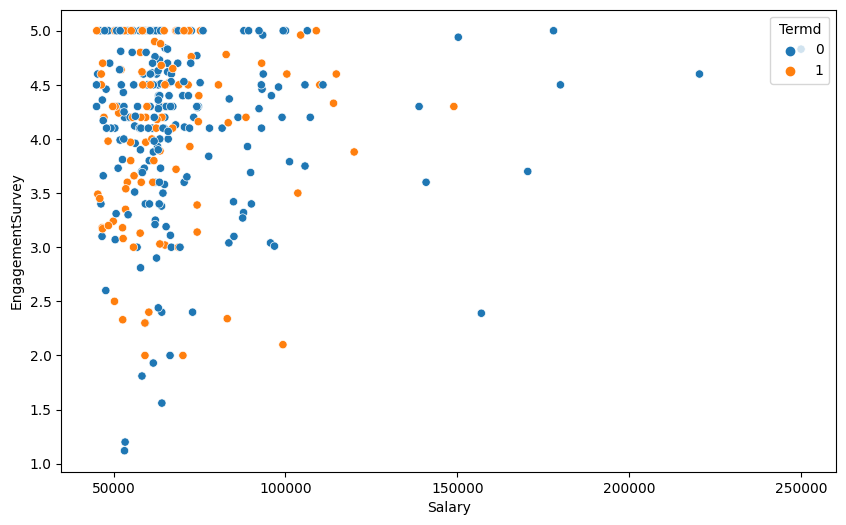

In [9]:
#code here

# Membuat scatter plot dengan warna berbeda sesuai dengan status di "Termd"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data)

# Menambahkan label sumbu
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')

# Menampilkan plot
plt.legend(title='Termd', loc='upper right')
plt.show()


7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

<Figure size 1000x600 with 0 Axes>

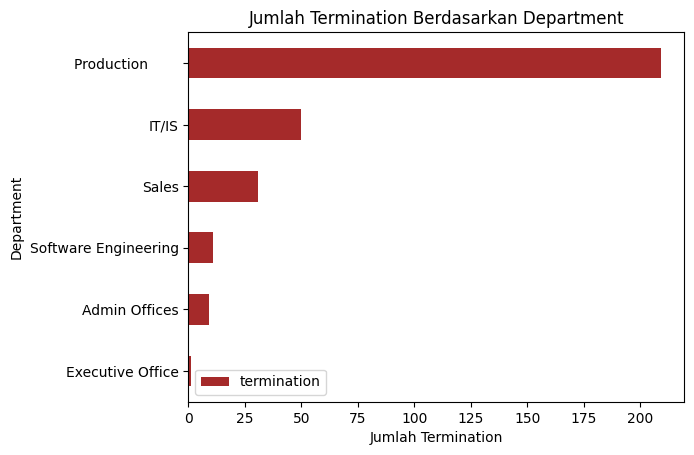

In [10]:
term = data.groupby(['Department']).\
            agg(termination = ('Termd','count')).\
            sort_values(by='termination', ascending = True)

# Membuat bar chart
plt.figure(figsize=(10, 6))
term.plot(kind='barh', color=['#A52A2A'])
plt.title('Jumlah Termination Berdasarkan Department')
plt.xlabel('Jumlah Termination')
plt.ylabel('Department')

# Menampilkan plot
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

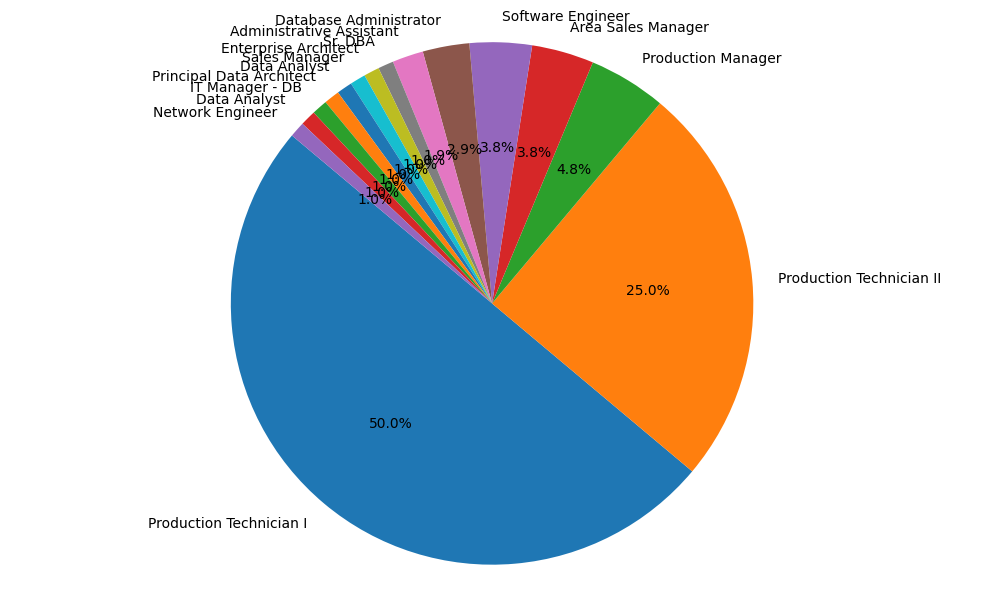

In [11]:
# Filter hanya karyawan yang "terminated"
terminated_data = data[data['Termd'] == 1]

# Menghitung jumlah karyawan yang "terminated" berdasarkan posisi
terminated_counts = terminated_data['Position'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(terminated_counts, labels=terminated_counts.index, autopct='%1.1f%%', startangle=140)

# Menampilkan pie chart
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.tight_layout()
plt.show()


9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

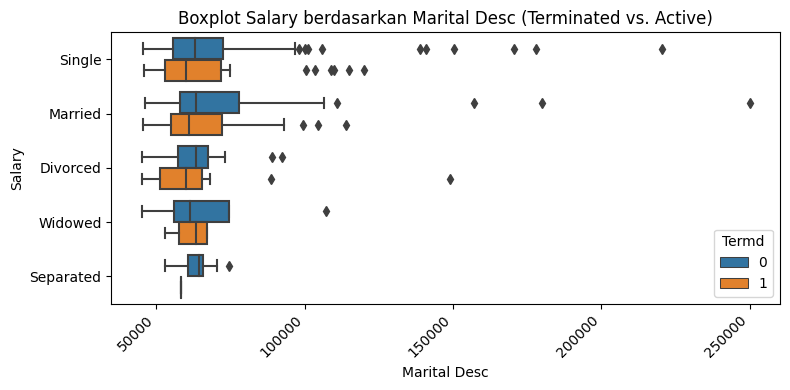

In [12]:
#code here
# Membuat boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data)
plt.title('Boxplot Salary berdasarkan Marital Desc (Terminated vs. Active)')
plt.xlabel('Marital Desc')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.legend(title='Termd', loc='lower right')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


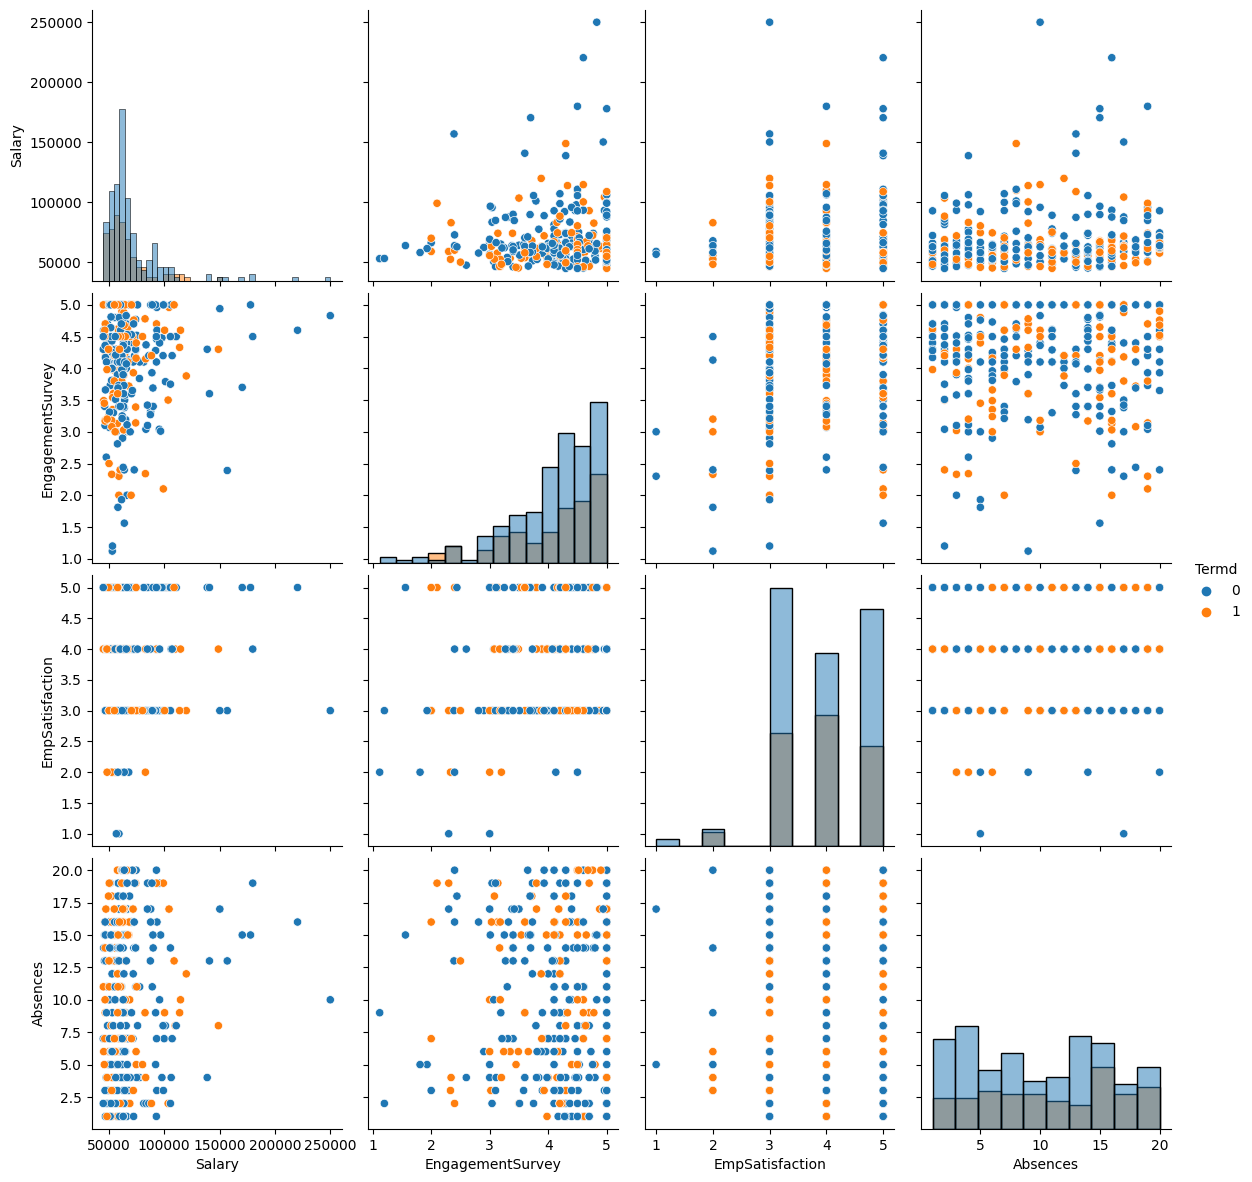

In [13]:
#code here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [14]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)

data['year'] = 2022  # Tahun saat ini
data['DOB_date'] = pd.to_datetime(data['DOB']) # Mengonversi kolom 'DOB' ke format datetime
data['Age'] = data['year'] - data['DOB_date'].dt.year

# Menampilkan DataFrame dengan kolom "Age" baru
print(data[['DOB_date', 'Age']])

      DOB_date  Age
0   1983-07-10   39
1   1975-05-05   47
2   1988-09-19   34
3   1988-09-27   34
4   1989-09-08   33
..         ...  ...
306 1985-05-11   37
307 1982-05-04   40
308 1979-08-30   43
309 1979-02-24   43
310 1978-08-17   44

[311 rows x 2 columns]


In [15]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menggunakan MinMaxScaler untuk melakukan penskalaan pada kolom "Salary"
data['Salary_MinMax'] = scaler.fit_transform(data[['Salary']])

# Menampilkan DataFrame dengan kolom "Salary_Scaled"
print(data[['Salary', 'Salary_MinMax']])

     Salary  Salary_MinMax
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [16]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

# looping untuk mengubah data object -> category
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Menampilkan tipe data kolom setelah perubahan
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [17]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
# Mengubah RecruitmentSource dengan menggunakan Label Encoder
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])
# Mengubah PerformanceScore dengan menggunakan Label Encoder
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])


print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [18]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
X = data.drop(columns=['Termd','Employee_Name',
                       'EmpID','EmpStatusID','FromDiversityJobFairID','Salary',
                       'Position','State','Zip','DOB','Sex', 'MaritalDesc',
                       'CitizenDesc',	'HispanicLatino', 'RaceDesc',	'DateofHire',
                       'DateofTermination',	'TermReason',	'EmploymentStatus',	'Department',
                       'ManagerName',	'ManagerID', 'LastPerformanceReview_Date',
                       'DaysLateLast30', 'DOB_date',	'year'])

#Independent Variable (feature)
y = data['Termd']

# Menampilkan independent variable (X)
X.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences,Age,Salary_MinMax
0,0,0,1,5,4,19,5,0,4.60,5,0,1,39,0.085190
1,1,1,1,3,3,27,4,1,4.96,3,6,17,47,0.289777
2,1,1,0,5,3,20,5,1,3.02,3,0,3,34,0.097139
3,1,1,0,5,3,19,4,1,4.84,5,0,15,34,0.097315
4,0,2,0,5,3,19,3,1,5.00,4,0,2,33,0.028197


In [19]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=128,
                                       max_features='log2',
                                       bootstrap=True,
                                       oob_score=True,
                                       random_state=42)

# Melatih model dengan data train
rf_classifier.fit(X_train, y_train)

# Memprediksi status "Termd" pada data test
y_pred = rf_classifier.predict(X_test)

# agar output score klasifikasi, precision score, recall score dalam bentuk persentase
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

# Menampilkan hasil evaluasi model dalam bentuk persentase
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

Accuracy: 65.08%
Precision: 50.00%
Recall: 22.73%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

###Answer:

19. Ada, berdasarkan nilai akurasi sekitar 65% dengan prediksi berdasarkan orang yang di terminated dari beberapa target seperti Department (person work for) hal itu juga dapat dipengaruhi oleh performance score.

In [21]:
data.groupby(['RecruitmentSource']).\
     agg('Termd').value_counts(normalize = True)

RecruitmentSource  Termd
0                  0        0.521739
                   1        0.478261
1                  1        0.551724
                   0        0.448276
2                  0        0.838710
                   1        0.161290
3                  1        0.612245
                   0        0.387755
4                  0        0.758621
                   1        0.241379
5                  0        0.763158
                   1        0.236842
6                  1        1.000000
7                  0        0.500000
                   1        0.500000
8                  0        0.923077
                   1        0.076923
Name: Termd, dtype: float64

20. Jika dilihat pada output di atas Recruitment Source dengan label encoder 8 memiliki rasio yang rendah berdasarkan terminated.